###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2018  by D. Koehn, T. Meier and R. Hartmann, notebook style sheet by L.A. Barba, N.C. Clementi

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = 'style/custom.css'
HTML(open(css_file, "r").read())

# Korrelation von Signalen: Korrelationskoeffizienten

Um die Ähnlichkeit von Zeitreihen zu untersuchen, müssen zunächst Maße definiert werden. In dieser Vorlesung diskutiere ich Vor- und Nachteile verschiedener Korrelationsmaße und erläutere deren Anwendungen auf Zeitreihen unterschiedlicher Komplexität. Als erstes Korrelationsmaß betrachten wir den Korrelationskoeffizienten.

## Der Korrelationskoeffizient

Seien $\{x_j\}$ und $\{y_j\}$ zwei Zeitreihen mit $n$ diskreten Zeitsampeln, dann läßt sich die Ähnlichkeit der beiden Signale durch den **Korrelationskoeffizienten** $\tilde{\rho}_{x,y}\in[-1,1]$ quantifizieren:

\begin{equation}
\tilde{\rho}_{x,y}=\frac{\sum\limits_{j}^nx_{j}y_{j}}{\sqrt{\sum\limits_{j}^nx_{j}^{2}\cdot\sum\limits_{j}^ny_{j}^{2}}},\\ \notag
\end{equation}

wobei die Summe der Quadrate der beiden Zeireihen ungleich Null sein müssen:

$$
\sum\limits_{j}^nx_{j}^{2} \ne 0,\; \sum\limits_{j}^ny_{j}^{2} \ne 0\notag
$$


Je größer $|\tilde{\rho}_{x,y}|$ desto ähnlicher ist der Verlauf der beiden Folgen.

Veranschaulichen wir uns den Korrelationskoeffizienten anhand einiger einfacher Beispiele. Im ersten Schritt definieren wir eine Zeitreihe bestehend aus einer Sinusfunktion mit einer Frequenz $f_0$ von 5 Hz

$$
x = \sin(\omega t) = \sin(2 \pi f_0 t) \notag
$$

wobei wir die Definition der Kreisfrequenz $\omega$ verwendet haben. In diskreter Form ergibt sich

$$
x_j = \sin(2 \pi f_0 j dt) \notag
$$

mit dem Sample-Intervall $dt$ und $t = j dt$

In [2]:
# Importiere Python Bibliotheken 
# ------------------------------
import numpy                      # Bibliothek NumPy
from scipy.stats import pearsonr  # Funktion Korrelationskoeffizient 
from gsv.gsv_func import *        # Bibliothek "Geophysikalische Signalverarbeitung"

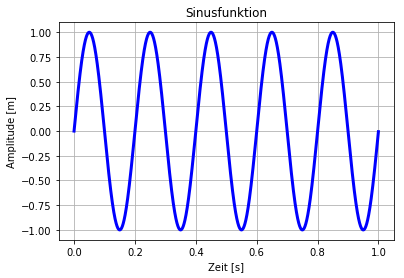

In [3]:
# Definiere Sinusfunktion
# -----------------------
f0 = 5   # Frequenz der Sinusfunktion [Hz]
time, sinus = create_sine(f0)

# Plotte Sinusfunktion
draw_func(time,sinus,'Sinusfunktion', 'Zeit [s]', 'Amplitude [m]')

Als erstes berechnen wir den Korrelationskoeffizienten der Sinusfunktion mit sich selbst. Dazu verwenden wir die SciPy Funktion `Pearsonr`

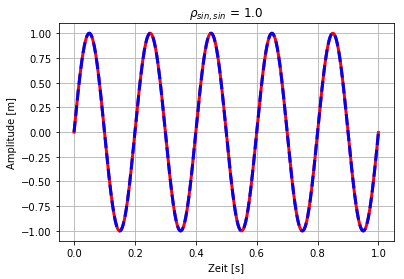

In [4]:
# Berechne Korrelationskoeffizienten der Sinus-Fkt. mit der der Sinus-Fkt.
rho_sin_sin = pearsonr(sinus,sinus)

# Plotte Funktionen und Korrelationskoeffizienten
draw_corr(time,sinus,sinus,r'$\rho_{sin,sin}$', 'Zeit [s]', 'Amplitude [m]',rho_sin_sin)

Da die Sinus-Funktion perfekt mit sich selbst korreliert, erhalten wir einen Korrelationskoeffizienten:

$$\tilde{\rho}_{sin,sin} = 1$$

Was passiert wenn wir die Amplitude der Sinus-Funktion um einen Faktor a vergrößern?

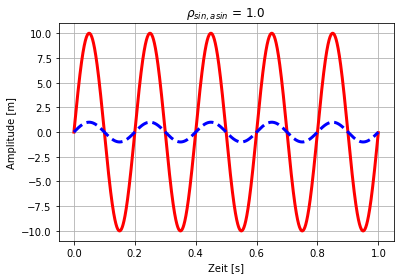

In [5]:
# Berechne Korrelationskoeffizienten der Sinus-Fkt. mit a * Sinus-Fkt.
a = 10
asinus = a * sinus
rho_sin_asin = pearsonr(sinus,asinus)

# Plotte Funktionen und Korrelationskoeffizienten
draw_corr(time,sinus,asinus,r'$\rho_{sin,asin}$', 'Zeit [s]', 'Amplitude [m]',rho_sin_asin)

Die Korrelation scheint laut Korrelationskoeffizient 

$$ \tilde{\rho}_{sin,asin} = 1 $$

immernoch perfekt. Das ist nicht wirklich verwunderlich, da der Korrelationskoeffizient per Definition normiert ist:

\begin{equation}
\tilde{\rho}_{x,y}=\frac{\sum\limits_{j}^nx_{j}y_{j}}{\sqrt{\sum\limits_{j}^nx_{j}^{2}\cdot\sum\limits_{j}^ny_{j}^{2}}},\\ \notag
\end{equation}

Ersetzen wir z.B. 

$$x_j \rightarrow a x_j$$

folgt

\begin{equation}
\tilde{\rho}_{x,y}=\frac{\sum\limits_{j}^nax_{j}y_{j}}{\sqrt{\sum\limits_{j}^na^2x_{j}^{2}\cdot\sum\limits_{j}^ny_{j}^{2}}},\\ \notag
\end{equation}

oder

\begin{equation}
\tilde{\rho}_{x,y}=\frac{a\sum\limits_{j}^nx_{j}y_{j}}{a\sqrt{\sum\limits_{j}^nx_{j}^{2}\cdot\sum\limits_{j}^ny_{j}^{2}}},\\ \notag
\end{equation}

so daß sich jeder beliebige Faktor $a$ herauskürzen läßt.

Kehren wir die Phase einer Sinus-Funktion um, folgt eine ...

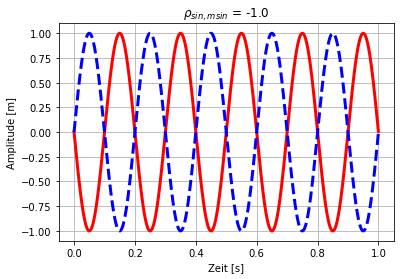

In [6]:
# Berechne Korrelationskoeffizienten der Sinus-Fkt. mit -1 Sinus-Fkt.
msinus = - sinus
rho_sin_msin = pearsonr(sinus,msinus)

# Plotte Funktionen und Korrelationskoeffizienten
draw_corr(time,sinus,msinus,r'$\rho_{sin,msin}$', 'Zeit [s]', 'Amplitude [m]',rho_sin_msin)

... **Antikorrelation**, was durch einen negativen Korrelationskoeffizienten 

$$ \tilde{\rho}_{sin,msin} = -1 $$

angezeigt wird. 

Realistischerweise würde man niemals eine Zeitreihe ohne Messfehler aufzeichnen. Addieren wir mal etwas normalverteiltes Rauschen mit einer Amplitude von 0.1 m ...

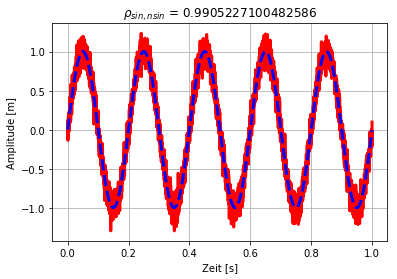

In [7]:
# Erzeuge normalverteiltes Rauschen 
noise_amp = 0.1
noise = numpy.random.normal(0,noise_amp,len(time)) 

# Addiere Noise auf die Sinusfunktion
nsinus =  sinus + noise

# Berechne Korrelationskoeffizienten der Sinus-Fkt. mit 0.1 * Noise * Sinus-Fkt.
rho_sin_nsin = pearsonr(sinus,nsinus)

# Plotte Funktionen und Korrelationskoeffizienten
draw_corr(time,sinus,nsinus,r'$\rho_{sin,nsin}$', 'Zeit [s]', 'Amplitude [m]',rho_sin_nsin)

Bei einer 10% Noiseamplitude ist der Korrelationskoeffizient immernoch sehr hoch. Erhöhen wir die Noiseamplitude "etwas" mehr auf 1000 % ...

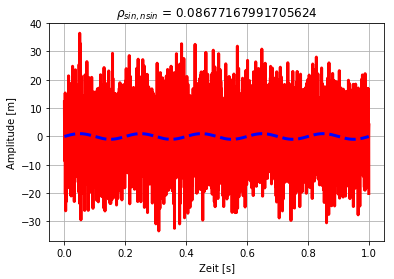

In [8]:
# Erzeuge normalverteiltes Rauschen 
noise_amp = 10
noise = numpy.random.normal(0,noise_amp,len(time)) 

# Addiere Noise auf die Sinusfunktion
nsinus =  sinus + noise

# Berechne Korrelationskoeffizienten der Sinus-Fkt. mit 0.1 * Noise * Sinus-Fkt.
rho_sin_nsin = pearsonr(sinus,nsinus)

# Plotte Funktionen und Korrelationskoeffizienten
draw_corr(time,sinus,nsinus,r'$\rho_{sin,nsin}$', 'Zeit [s]', 'Amplitude [m]',rho_sin_nsin)

... folgt eine sehr geringe Korrelation von 

$$\rho_{sin,nsin} = 0.09$$

Im Fall eines Korrelationskoeffizienten von Null wären die beiden Zeittreihen **unkorreliert**.

Zusammenfassend gilt also:

\begin{equation}
\begin{split}
\tilde{\rho}_{x,y}&=
\begin{cases}
1&\{x_j\}\text{ und }\{y_j\}\text{ identisch bis auf Faktor }a>0\\
%&\{x_j\}=a\cdot\{y_j\}\text{ mit }a>0\\
0&\{x_j\}\text{ und }\{y_j\}\text{ unkorrelliert}\\
-1&\{x_j\}\text{ und }\{y_j\}\text{ identisch bis auf Faktor }a<0\\
%&\{x_j\}=a\cdot\{y_j\}\text{ mit }a<0 (antikorreliert)
\end{cases}
\end{split}
\notag
\end{equation}

Je größer $|\tilde{\rho}_{x,y}|$ desto ähnlicher sind sich die beiden Zeitreihen.

## Anwendungenbeispiele für die Korrelation von Zeitreihen

Schauen wir uns als erstes zwei Zeitreihen an, die teilweise zu einem wahren Glaubenskrieg führen. Wie gut korreliert die mittlere CO2 Konzentration in der Erdatmosphäre mit der mittleren Oberflächentemperatur in den letzten Jahrtausenden? Entsprechende Zeitreihen finden sich z.B. hier auf [klimafakten.de](https://www.klimafakten.de/behauptungen/behauptung-der-co2-anstieg-ist-nicht-ursache-sondern-folge-des-klimawandels). Die sehr gute Korrelation der beiden Zeitreihen in Abb. 1 scheint auf den ersten Blick einen eindeutigen Zusammenhang zwischen CO2-Konzentration in der Atmosphäre und Temperaturvariation zu beweisen. Aber Moment mal, das CO2-Signal scheint teilweise nach einer Temperaturvariation aufzutreten. Ein Grund dafür ist die reduzierte Löslichkeit von CO2 bei einer Erhöhung der Wassertemperatur, was zu einem sich aufschaukelnden Treibhauseffekt führt. 

Eine weitere bekannt Korrelation: Die Anzahl von Störchen korreliert sehr gut mit der Geburtenrate, wie z.B. in diesem Paper 

[Matthews (2001), Storks Deliver Babies (p=0.008), Teaching Statistics ](https://onlinelibrary.wiley.com/doi/abs/10.1111/1467-9639.00013)

gezeigt wird. Dieses Beispiel, zeigt daß man mit Korrelationsmaßen häufig eine gewisse Korrelation nachweisen kann. Daraus darf man allerdings **nicht** schlußfolgern, daß eine **Ursache-Wirkungsbeziehung** zwischen den Zeitreihen exisitiert. Es lassen sich fast perfekte Korrelationen oder Antikorrelationen zwischen Zeitreihen finden, zwischen denen keine Ursache-Wirkungsbeziehung besteht. Sehr schöne Beispiele finden sich hier:

[Scheinkorrelation](https://scheinkorrelation.jimdo.com/)

Zum Schluß ein nettes Beispiel, das mir Anfang des Jahres über den Weg gelaufen ist. In der folgenden Abbildung sieht man eine relativ gute Korrelation zwischen dem Dichte/S-Wellengeschwindigkeitsmodell, das ich mit [seismischer Full Waveform Inversion (FWI) aus einem SH-Datensatz am Standort Kleinneudorf](https://www.researchgate.net/publication/329802721_Charakterisierung_einer_Storungszone_ostlich_des_Grossen_Ploner_Sees_Schleswig-Holstein_mittels_2D_SH_Full_Waveform_Inversion) bestimmt hatte, und den Bohrkerndaten der Geologen

<img src="images/KN_FWI_vs_borehole.jpg" style="width: 800px;"/>

Es existieren offensichtliche Ursache-Wirkungsbeziehungen. Das Dichtemodell aus der Seismik sollte mit der Dichte aus dem Bohrkern korrelieren. Die "Schlagzahl pro Meter" mit der die Bohrung in den Untergrund getrieben wurde, ist bei hoher Scherfestigkeit (S-Wellengeschwindigkeit) größer als bei kleiner Scherfestigkeit. Die gute Korrelation zwischen Bohrlochdaten und FWI-Ergebnis, in Kombination mit einer Ursache-Wirkungsbeziehung, würde also die Ergebnisse der seismischen Inversion bestätigen. 

Das Problem: Die Bohrlochdaten stammten aus einem 50 m weiter nördlich gelegenen Bohrloch. Die gute Korrelation ist also auch hier reiner Zufall, trotz einer plausiblen Ursache-Wirkungsbeziehung.

## Zusammenfassung:

- Mit dem Korrelationskoeffizienten läßt sich der Grad der Korrelation zweier Zeitreihen quantifizieren

- Eine starke Korrelation von Zeitreihen ist jedoch kein Beweis für eine Ursache-Wirkungsbeziehung

- Selbst bei einer Ursache-Wirkungsbeziehung kann eine hohe Korrelation von Zeitreihen trotzdem reiner Zufall sein